In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from paretoset import paretoset

import model_functions as fmodel

# Matrix ISA Model Example Usage

### Number of Registers to Hide Memory Latency

using larger memories with higher latency requires more matrix registers to acheive high utilization. below is a plot showing how utilization is affected by memory latency for different matrix register counts.

100%|██████████| 100/100 [00:00<00:00, 1305.42it/s]


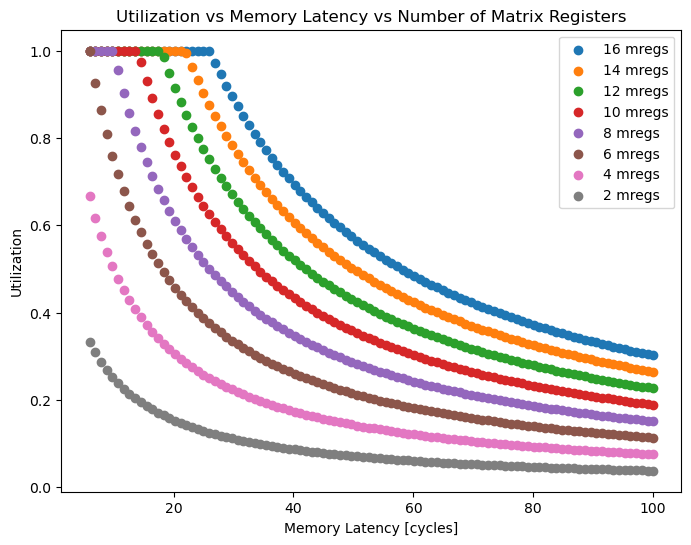

In [2]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Utilization vs Memory Latency vs Number of Matrix Registers')
axs.set_xlabel('Memory Latency [cycles]')
axs.set_ylabel('Utilization')

level = 1
databits = np.array([32])
slice_values = np.linspace(6, 100, 100)
num_mregs = np.array(range(16, 0, -2))
for n in num_mregs:
    perf_model = fmodel.init_pm(databits, t_mem=slice_values, num_mregs=np.array([n]))

    x = perf_model.index.levels[level]
    y = perf_model['util']
    scatter = axs.scatter(x, y, label=f'{n} mregs')
    axs.legend()

100%|██████████| 100/100 [00:00<00:00, 1300.98it/s]
/var/folders/hc/58trqhn5091504q0fyxy68jc0000gn/T/ipykernel_25520/839808576.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = axs.scatter(x, y, cmap='viridis', s=100)


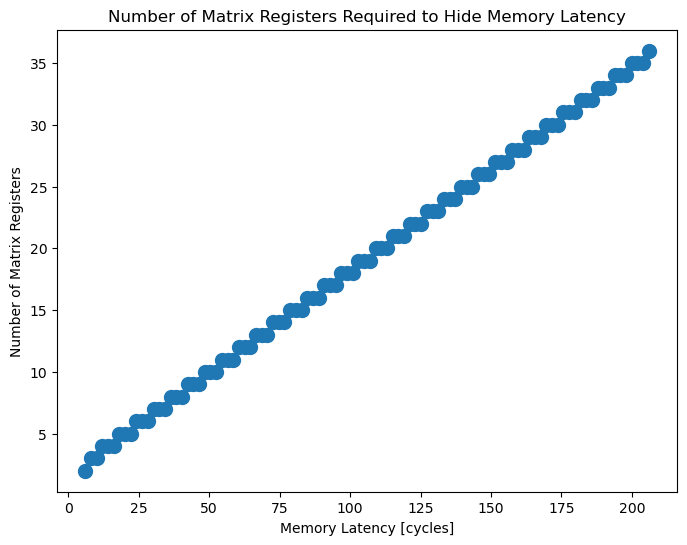

In [3]:
level = 1
slice_values = np.linspace(6,206,100)
perf_model = fmodel.init_pm(t_mem=slice_values)

fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Number of Matrix Registers Required to Hide Memory Latency')
axs.set_xlabel('Memory Latency [cycles]')
axs.set_ylabel('Number of Matrix Registers')

x = perf_model.index.levels[level]
y = perf_model['max_mregs']
scatter = axs.scatter(x, y, cmap='viridis', s=100)

100%|██████████| 100/100 [00:00<00:00, 1309.72it/s]


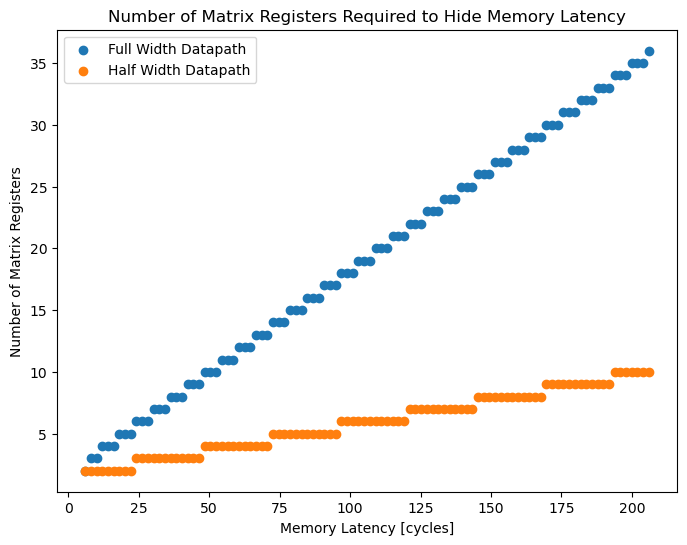

In [4]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Number of Matrix Registers Required to Hide Memory Latency')
axs.set_xlabel('Memory Latency [cycles]')
axs.set_ylabel('Number of Matrix Registers')
scatter = axs.scatter(x, y, label='Full Width Datapath')

level = 1
slice_values = np.linspace(6,206,100)
perf_model = fmodel.init_pm(t_mem=slice_values,width_mmu=np.array([0.5]))

x = perf_model.index.levels[level]
y = perf_model['max_mregs']
scatter = axs.scatter(x, y, label='Half Width Datapath')
axs.legend()

### Exploring Design Space

The model can be used to sweep ranges of the input parameters, and the output performance specs can be visualized using pareto-optimal curves.

With these plots we can visualize the tradeoffs between ngates capacity, memory bandwidth, and performance (operations per cycle).

100%|██████████| 239616/239616 [02:50<00:00, 1404.09it/s]


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu          
32       20    4  4  12 256      1  16.0 16.0 4         0    0.5        120.0   
                     20 256      1  16.0 16.0 2         0    1.0         68.0   
                                              4         0    0.5        152.0   
                                                             1.0         68.0   
                     28 256      1  16.0 16.0 2         0    1.0         76.0   
...                                                                       ...   
               60 60 60 256      1  32.0 60.0 4         2    0.5        280.0   
                                    64.0 32.0 4         1    0.5        312.0   
                                         60.0 4         0    0.5        400.0   
                                                        1    0.5        340.0   
                                                        2    0.5        280.0   

                                                                            util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
32       20    4  4  12 256      1  16.0 16.0 4         0    0.5        0.400000   
                     20 256      1  16.0 16.0 2         0    1.0        0.588235   
                                              4         0    0.5        0.526316   
                                                             1.0        1.000000   
                     28 256      1  16.0 16.0 2         0    1.0        0.736842   
...                                                                          ...   
               60 60 60 256      1  32.0 60.0 4         2    0.5        0.803571   
                                    64.0 32.0 4         1    0.5        0.676082   
                                         60.0 4         0    0.5        0.562500   
                                                        1    0.5        0.661765   
                                                        2    0.5        0.803571   

                                                                         ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu               
32       20    4  4  12 256      1  16.0 16.0 4         0    0.5         25.600000   
                     20 256      1  16.0 16.0 2         0    1.0         37.647059   
                                              4         0    0.5         33.684211   
                                                             1.0         64.000000   
                     28 256      1  16.0 16.0 2         0    1.0         47.157895   
...                                                                            ...   
               60 60 60 256      1  32.0 60.0 4         2    0.5        385.714286   
                                    64.0 32.0 4         1    0.5        346.153846   
                                         60.0 4         0    0.5        540.000000   
                                                        1    0.5        635.294118   
                                                        2    0.5        771.428571   

                                                                        max_mregs  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4  4  12 256      1  16.0 16.0 4         0    0.5              2.0   
                     20 256      1  16.0 16.0 2         0    1.0              3.0   
                                              4         0    0.5              2.0   
                                                             1.0              3.0   
                     28 256      1  16.0 16.0 2         0    1.0              3.0   
...                                                                           ...   
               60 60 60 256      1  32.0 60.0 4         2    0.5              2.0   
                                    64.0 3

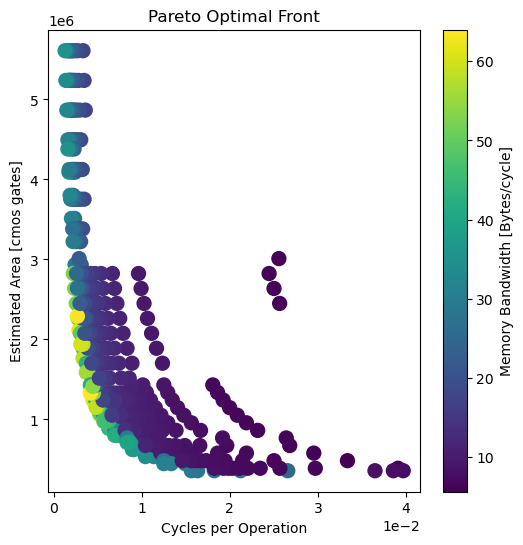

In [5]:
perf_model = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5, 1])
)
perf_model = perf_model[perf_model['max_mem_bw'] <= 64]
perf_model = perf_model[perf_model['ops_cycle'] >= 1/4e-2]

pm_pareto = perf_model[['ops_cycle','opu_gates', 'max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model.loc[mask,'max_mem_bw']
ngates = perf_model.loc[mask,'opu_gates']
opc = perf_model.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.colorbar(scatter, ax=axs, label='Memory Bandwidth [Bytes/cycle]')
perf_model[mask]

t_uk  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op width_mmu          
32       20    4  20 4 256      1  64.0 16.0 4         0    0.5         88.0   
               12 20 4 256      1  64.0 20.0 4         0    0.5         96.0   
                                        32.0 4         0    0.5        120.0   
                                        36.0 4         0    0.5        128.0   
                                        40.0 4         0    0.5        136.0   
                                        44.0 4         0    0.5        144.0   
                                        48.0 2         0    0.5        152.0   
               20 20 4 256      1  64.0 24.0 4         0    0.5        104.0   
                                        64.0 4         0    0.5        184.0   
                  28 4 256      1  64.0 60.0 2         0    0.5        176.0   
                  52 4 256      1  64.0 52.0 2         0    0.5        160.0   
               28 52 4 256      1  64.0 48.0 2         0    0.5        152.0   
               36 20 4 256      1  64.0 28.0 4         0    0.5        112.0   
                  36 4 256      1  64.0 64.0 2         0    0.5        184.0   
               44 36 4 256      1  64.0 56.0 2         0    0.5        168.0   

                                                                           util  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
32       20    4  20 4 256      1  64.0 16.0 4         0    0.5        0.113636   
               12 20 4 256      1  64.0 20.0 4         0    0.5        0.083333   
                                        32.0 4         0    0.5        0.062500   
                                        36.0 4         0    0.5        0.052083   
                                        40.0 4         0    0.5        0.044118   
                                        44.0 4         0    0.5        0.037879   
                                        48.0 2         0    0.5        0.032895   
               20 20 4 256      1  64.0 24.0 4         0    0.5        0.080128   
                                        64.0 4         0    0.5        0.033967   
                  28 4 256      1  64.0 60.0 2         0    0.5        0.026515   
                  52 4 256      1  64.0 52.0 2         0    0.5        0.031250   
               28 52 4 256      1  64.0 48.0 2         0    0.5        0.033260   
               36 20 4 256      1  64.0 28.0 4         0    0.5        0.076531   
                  36 4 256      1  64.0 64.0 2         0    0.5        0.024457   
               44 36 4 256      1  64.0 56.0 2         0    0.5        0.028061   

                                                                       ops_cycle  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4  20 4 256      1  64.0 16.0 4         0    0.5        29.090909   
               12 20 4 256      1  64.0 20.0 4         0    0.5        26.666667   
                                        32.0 4         0    0.5        32.000000   
                                        36.0 4         0    0.5        30.000000   
                                        40.0 4         0    0.5        28.235294   
                                        44.0 4         0    0.5        26.666667   
                                        48.0 2         0    0.5        25.263158   
               20 20 4 256      1  64.0 24.0 4         0    0.5        30.769231   
                                        64.0 4         0    0.5        34.782609   
                  28 4 256      1  64.0 60.0 2         0    0.5        25.454545   
                  52 4 256      1  64.0 52.0 2         0    0.5        26.000000   
               28 52 4 256      1  64.0 48.0 2         0    0.5        25.543860   
               36 20 4 256      1  64.0 28.0 4         0    0.5        34.285714   
                  36 4 256      1  64.0

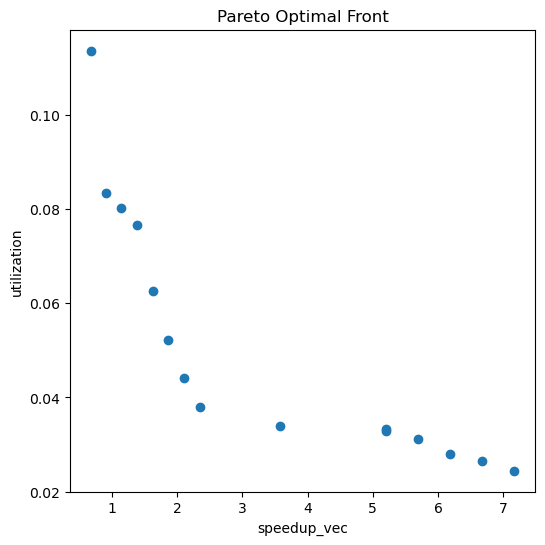

In [6]:
pm_pareto = perf_model[['speedup_vec','util']]
mask = paretoset(pm_pareto, sense=['min', 'min'])

speedup_vec = perf_model.loc[mask,'speedup_vec']
util = perf_model.loc[mask,'util']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('speedup_vec')
axs.set_ylabel('utilization')

scatter = axs.scatter(speedup_vec, util)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
perf_model[mask]

100%|██████████| 512/512 [00:00<00:00, 1416.50it/s]


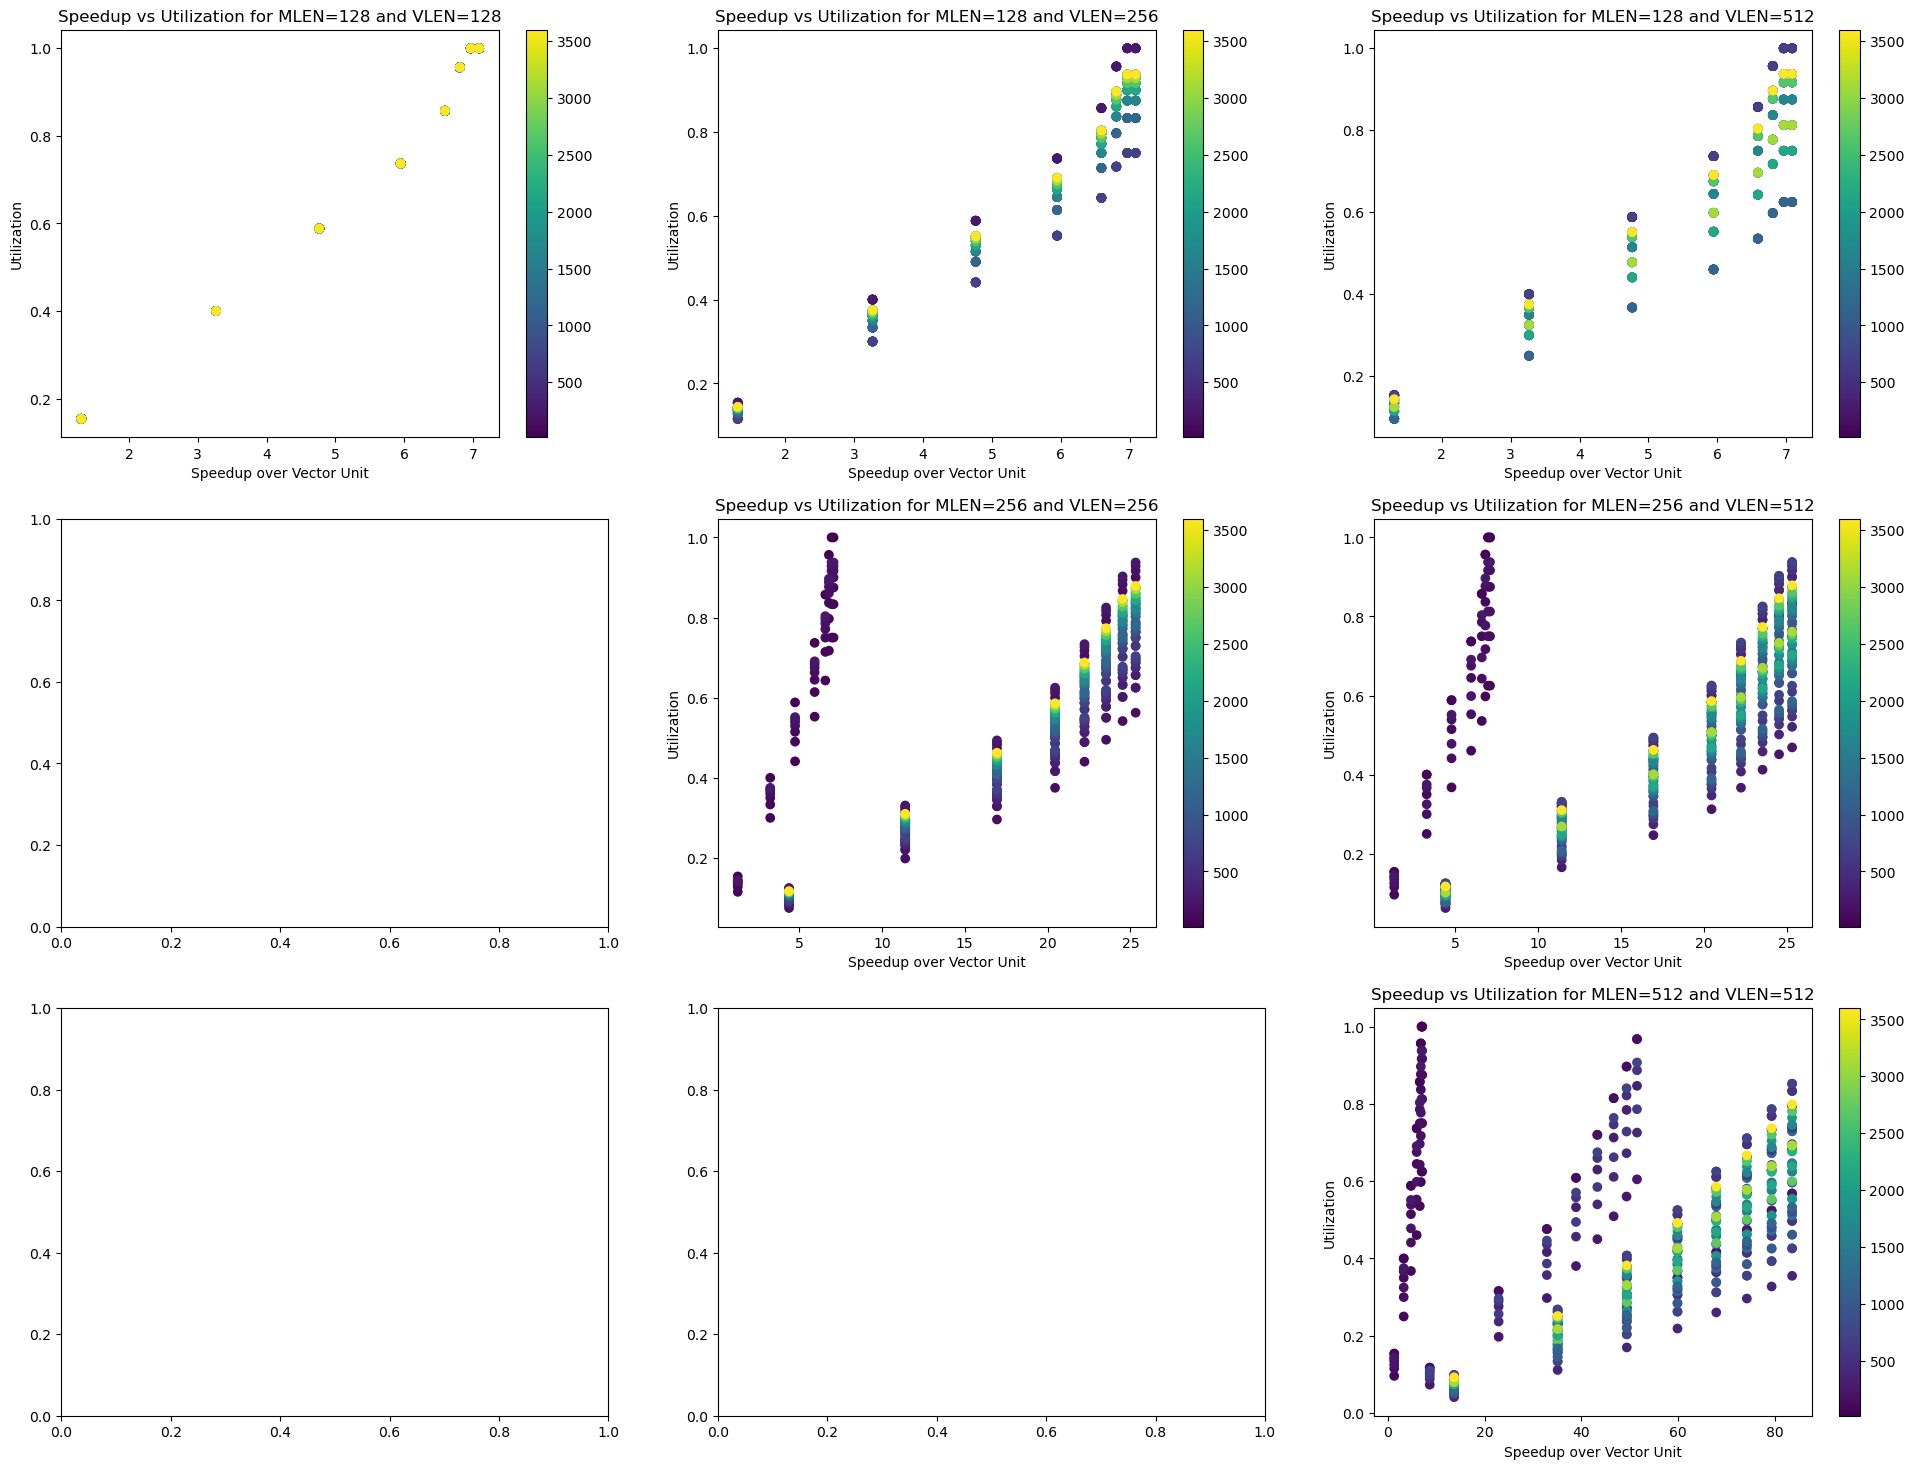

In [ ]:
# mlB = np.array(range(128,513, 64))/8
mlB = np.array([128, 256, 512])/8
vlB = np.array([128, 256, 512])/8
num_mregs = np.array(range(2,6,2))
t_op = np.array([0, 1, 2])
width_mmu = np.array([0.5, 1])

fig, axs = plt.subplots(len(mlB),len(vlB), figsize=(8*len(mlB), 6*len(vlB)))
for n in range(len(vlB)):
    for m in range(len(mlB)):
        if mlB[m] <= vlB[n]:
            perf_model = fmodel.init_pm(mlB=np.array([mlB[m]]), vlB=np.array([vlB[n]]),                   
                                        N = np.array(range(4,64, 8)),
                                        M = np.array(range(4,64, 8)),
                                        K = np.array(range(4,64, 8)))

            # Create a 3x3 subplot
            ax = axs[m,n]
            ax.set_title(f'Speedup vs Utilization for MLEN={int(mlB[m]*8)} and VLEN={int(8*vlB[n])}')
            ax.set_xlabel('Speedup over Vector Unit')
            ax.set_ylabel('Utilization')
            perf_model['tile_size'] = perf_model.index.get_level_values('N') * perf_model.index.get_level_values('M') + perf_model.index.get_level_values('M') * perf_model.index.get_level_values('K') + perf_model.index.get_level_values('N') * perf_model.index.get_level_values('K')
            scatter = ax.scatter(perf_model['speedup_vec'], perf_model['util'],  
                                    c=perf_model['tile_size'], cmap='viridis')
            cbar = plt.colorbar(scatter, ax=ax)
plt.show()

100%|██████████| 512/512 [00:00<00:00, 1488.09it/s]


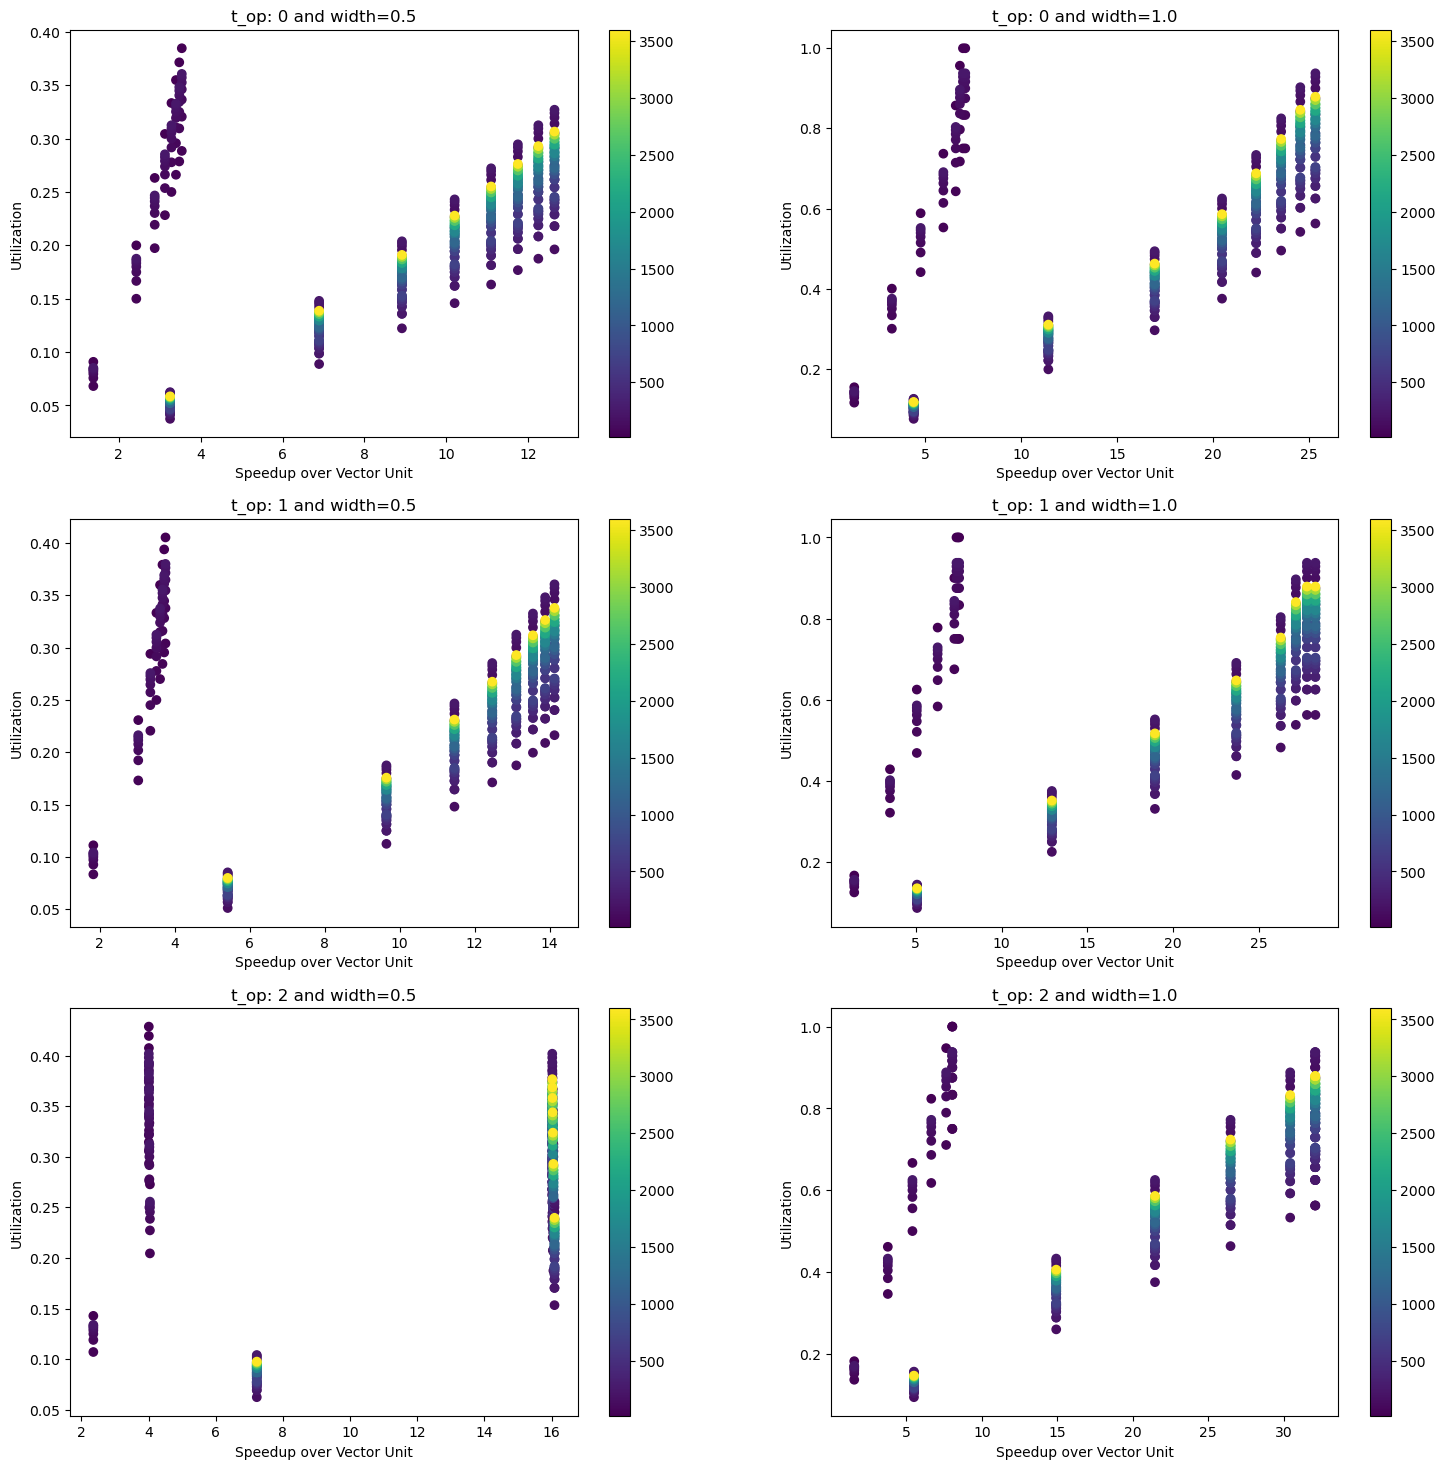

In [88]:

# mlB = np.array(range(128,513, 32))/8
mlB = np.array([128, 256, 512])/8
vlB = np.array([128, 256, 512])/8
num_mregs = np.array(range(2,6,2))
t_op = np.array([0, 1, 2])
width_mmu = np.array([0.5, 1])

fig, axs = plt.subplots(len(t_op), len(width_mmu), figsize=(18, 18))
for m in range(len(t_op)):
    for n in range(len(width_mmu)):
        perf_model = fmodel.init_pm(t_op=np.array([t_op[m]]), width_mmu=np.array([width_mmu[n]]),                   
                                    N = np.array(range(4,64, 8)),
                                    M = np.array(range(4,64, 8)),
                                    K = np.array(range(4,64, 8)))

        # Create a 3x3 subplot
        ax = axs[m,n]
        ax.set_title(f't_op: {t_op[m]} and width={width_mmu[n]}')
        ax.set_xlabel('Speedup over Vector Unit')
        ax.set_ylabel('Utilization')
        perf_model['tile_size'] = perf_model.index.get_level_values('N') * perf_model.index.get_level_values('M')
        scatter = ax.scatter(perf_model['speedup_vec'], perf_model['util'],  
                                c=perf_model['tile_size'], cmap='viridis')
        cbar = plt.colorbar(scatter, ax=ax)
plt.show()

In [81]:

# mlB = np.array(range(128,513, 32))/8
mlB = np.array([128, 256, 512])/8
vlB = np.array([128, 256, 512])/8
num_mregs = np.array(range(2,6,2))
t_op = np.array([0, 1, 2])
width_mmu = np.array([0.5, 1])

def plot_nmk_scatter(x, y):
    fig, axs = plt.subplots(len(t_op), len(width_mmu), figsize=(18, 18))
    for m in range(len(t_op)):
        for n in range(len(width_mmu)):
                perf_model = fmodel.init_pm(t_op=np.array([t_op[m]]), width_mmu=np.array([width_mmu[n]]),                   
                                            N = np.array(range(4,64, 8)),
                                            M = np.array(range(4,64, 8)),
                                            K = np.array(range(4,64, 8)))

                # Create a 3x3 subplot
                ax = axs[m,n]
                ax.set_title(f'Speedup vs Utilization for MLEN={int(mlB[m]*8)} and VLEN={int(8*vlB[n])}')
                ax.set_xlabel('Speedup over Vector Unit')
                ax.set_ylabel('Utilization')
                perf_model['tile_size'] = perf_model.index.get_level_values('N') * perf_model.index.get_level_values('M')
                scatter = ax.scatter(perf_model['speedup_vec'], perf_model['util'],  
                                        c=perf_model['tile_size'], cmap='viridis')
                cbar = plt.colorbar(scatter, ax=ax)
    plt.show()

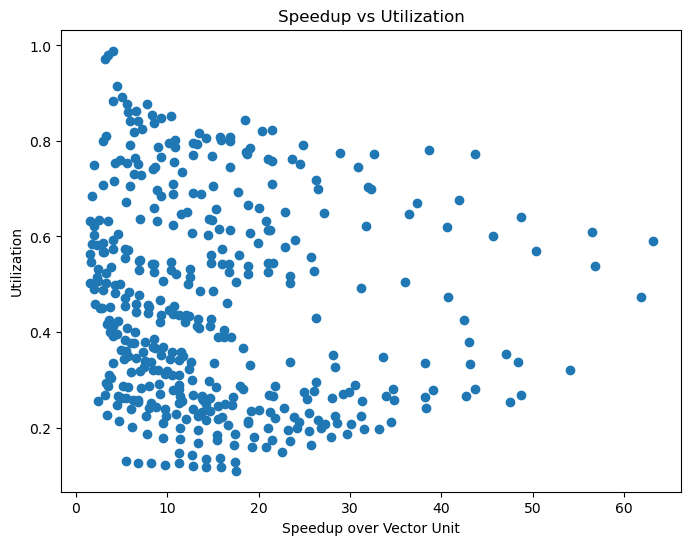

,vlB,mlB,num_mregs,t_op,width_mmu,util,speedup_vec
0,16.0,16.0,2,0,1.0,0.791249,5.918892
1,16.0,16.0,2,1,0.5,0.399672,3.740513
2,16.0,16.0,2,1,1.0,0.818764,6.351545
3,16.0,16.0,2,2,0.5,0.411660,4.010800
4,16.0,16.0,2,2,1.0,0.842729,6.795017
...,...,...,...,...,...,...,...
410,64.0,64.0,2,2,0.5,0.253051,47.533587
411,64.0,64.0,4,0,0.5,0.322242,12.344105
412,64.0,64.0,4,0,1.0,0.289145,11.232513
413,64.0,64.0,4,1,0.5,0.390386,16.158131


In [40]:
# Group by M, N, K and find the maximum speedup_vec for each group
avg_nmk = perf_model.groupby(['vlB', 'mlB', 'num_mregs', 't_op', 'width_mmu'])['util'].mean().reset_index()
avg_speedup = perf_model.groupby(['vlB', 'mlB', 'num_mregs', 't_op', 'width_mmu'])['speedup_vec'].mean().reset_index()
avg_nmk['speedup_vec'] = avg_speedup['speedup_vec']

pm_pareto = avg_nmk[['speedup_vec','util']]
mask = paretoset(pm_pareto, sense=['max', 'max'])

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Speedup vs Utilization')
axs.set_xlabel('Speedup over Vector Unit')
axs.set_ylabel('Utilization')

scatter = axs.scatter(avg_nmk['speedup_vec'], avg_nmk['util'])
plt.show()
# Write the output to a file
with open('avg_nmk.txt', 'w') as f:
    sorted = avg_nmk.sort_values(by='speedup_vec', ascending=False)
    f.write(sorted.to_string())
avg_nmk

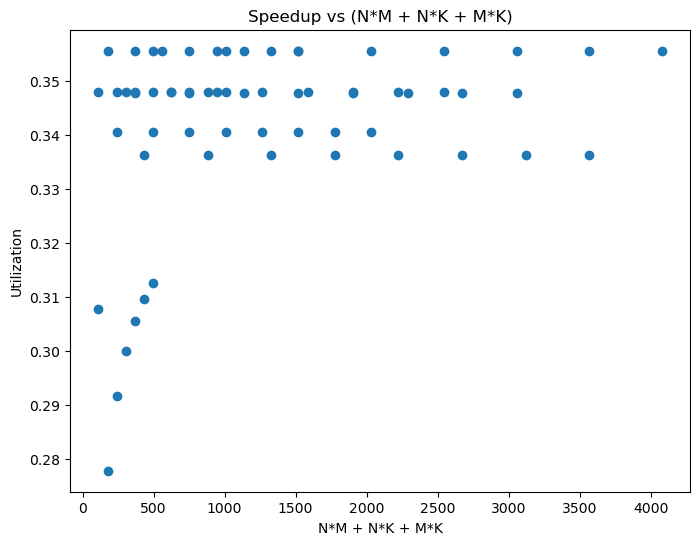

,M,N,K,util,NM_NK_MK
7,4,12,4,0.307692,112
15,4,20,4,0.277778,176
23,4,28,4,0.291667,240
31,4,36,4,0.300000,304
39,4,44,4,0.305556,368
...,...,...,...,...,...
471,60,28,4,0.355556,2032
479,60,36,4,0.355556,2544
487,60,44,4,0.355556,3056
495,60,52,4,0.355556,3568


In [7]:
# Group by M, N, K and find the maximum speedup_vec for each group
max_speedup = perf_model.groupby(['M', 'N', 'K'])['util'].max().reset_index()
max_speedup = max_speedup[max_speedup['util'] <= 0.7]

max_speedup['NM_NK_MK'] = max_speedup['N'] * max_speedup['M'] + max_speedup['N'] * max_speedup['K'] + max_speedup['M'] * max_speedup['K']

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Speedup vs (N*M + N*K + M*K)')
axs.set_xlabel('N*M + N*K + M*K')
axs.set_ylabel('Utilization')

scatter = axs.scatter(max_speedup['NM_NK_MK'], max_speedup['util'])
plt.show()
# Write the output to a file
with open('util.txt', 'w') as f:
    sorted_speedup = max_speedup
    f.write(sorted_speedup.to_string())
max_speedup

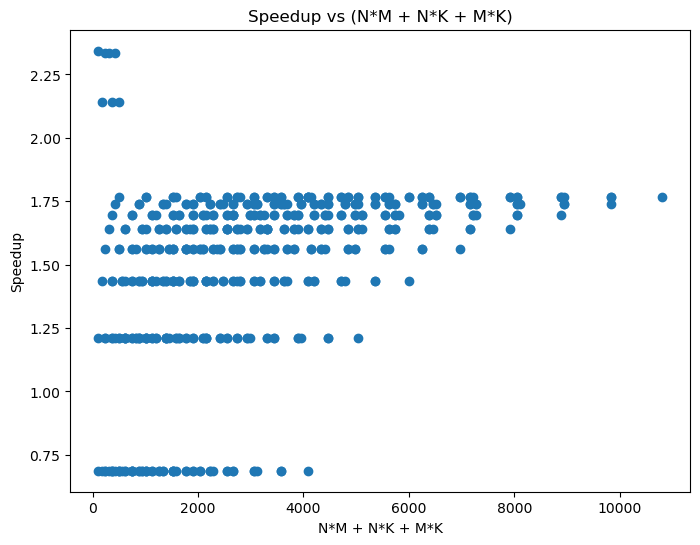

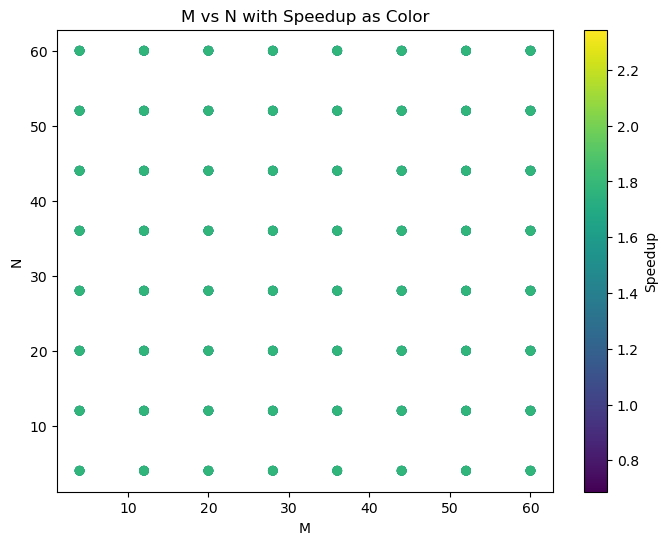

0      1.212500
1      1.437500
2      1.562500
3      1.642045
4      1.697115
         ...   
506    1.562500
507    1.642045
508    1.697115
509    1.737500
510    1.768382
Name: speedup_vec, Length: 511, dtype: float64

In [8]:
# Group by M, N, K and find the maximum speedup_vec for each group
max_speedup = perf_model.groupby(['M', 'N', 'K'])['speedup_vec'].min().reset_index()
# max_speedup = max_speedup[max_speedup['speedup_vec'] <= 20]

# Write the output to a file
with open('speedup_vec.txt', 'w') as f:
    sorted_speedup = max_speedup
    f.write(sorted_speedup.to_string())
max_speedup['NM_NK_MK'] = max_speedup['N'] * max_speedup['M'] + max_speedup['N'] * max_speedup['K'] + max_speedup['M'] * max_speedup['K']

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Speedup vs (N*M + N*K + M*K)')
axs.set_xlabel('N*M + N*K + M*K')
axs.set_ylabel('Speedup')

scatter = axs.scatter(max_speedup['NM_NK_MK'], max_speedup['speedup_vec'])
plt.show()

# Scatter plot M vs N with color=speedup
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(max_speedup['M'], max_speedup['N'], c=max_speedup['speedup_vec'], cmap='viridis')
ax.set_title('M vs N with Speedup as Color')
ax.set_xlabel('M')
ax.set_ylabel('N')
fig.colorbar(scatter, ax=ax, label='Speedup')
plt.show()

max_speedup['speedup_vec']

/var/folders/hc/58trqhn5091504q0fyxy68jc0000gn/T/ipykernel_25520/1783591338.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x_labels, rotation=90)


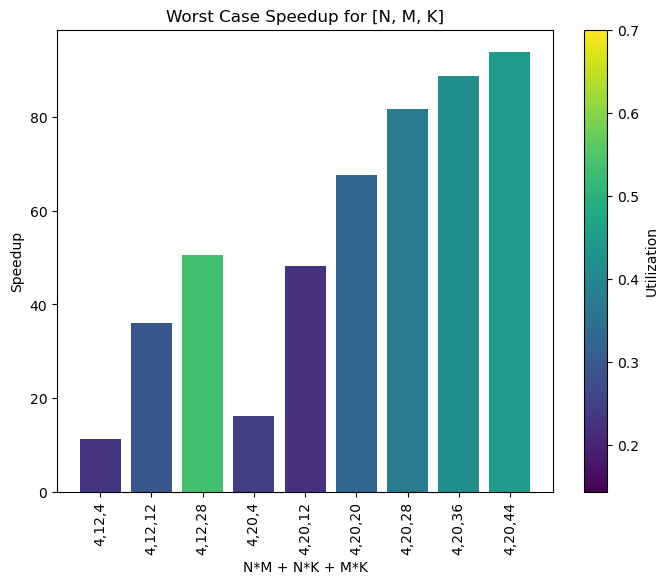

t_uk      util   ops_cycle  max_mregs  max_mrf_capacity  \
M  N K  vlB  mlB                                                              
12 4 4  16.0 48.0   52.0  0.153846   29.538462        5.0          1.250000   
     12 16.0 48.0   88.0  0.272727   52.363636        2.0          0.500000   
     28 16.0 48.0   80.0  0.700000  134.400000        2.0          0.500000   
20 4 4  16.0 64.0   56.0  0.178571   45.714286        4.0          1.312500   
     12 16.0 64.0  104.0  0.144231   36.923077        2.0          0.656250   
     20 16.0 64.0   76.0  0.328947   84.210526        3.0          0.984375   
     28 16.0 64.0   84.0  0.416667  106.666667        2.0          0.656250   
     36 16.0 64.0   92.0  0.489130  125.217391        2.0          0.656250   
     44 16.0 64.0  100.0  0.550000  140.800000        2.0          0.656250   

                      mem_bw  max_mem_bw  mrf_capacity     mrf_bw  \
M  N K  vlB  mlB                                                    
12 4 4  16.0 48.0  16.000000   37.333333       0.50000  80.000000   
     12 16.0 48.0  18.000000   20.000000       0.50000  68.000000   
     28 16.0 48.0  44.000000   49.600000       0.50000  68.800000   
20 4 4  16.0 64.0  37.000000   36.000000       1.31250  96.000000   
     12 16.0 64.0  20.500000   19.000000       0.65625  84.000000   
     20 16.0 64.0  53.052632   51.555556       0.65625  87.111111   
     28 16.0 64.0  61.818182   56.727273       0.65625  85.818182   
     36 16.0 64.0  65.846154   60.307692       0.65625  84.923077   
     44 16.0 64.0  68.800000   62.933333       0.65625  84.266667   

                   speedup_vec  macc_gates  mrf_gates  opu_gates  insts_cycle  \
M  N K  vlB  mlB                                                                
12 4 4  16.0 48.0    11.307692    983040.0    81920.0  1064960.0     0.076923   
     12 16.0 48.0    36.125000    983040.0    81920.0  1064960.0     0.125000   
     28 16.0 48.0    50.550000    983040.0    81920.0  1064960.0     0.350000   
20 4 4  16.0 64.0    16.250000   1310720.0   215040.0  1525760.0     0.062500   
     12 16.0 64.0    48.125000   1310720.0   107520.0  1418240.0     0.093750   
     20 16.0 64.0    67.578947   1310720.0   107520.0  1418240.0     0.263158   
     28 16.0 64.0    81.636364   1310720.0   107520.0  1418240.0     0.318182   
     36 16.0 64.0    88.769231   1310720.0   107520.0  1418240.0     0.346154   
     44 16.0 64.0    94.000000   1310720.0   107520.0  1418240.0     0.366667   

                   NM_NK_MK  
M  N K  vlB  mlB             
12 4 4  16.0 48.0       112  
     12 16.0 48.0       240  
     28 16.0 48.0       496  
20 4 4  16.0 64.0       176  
     12 16.0 64.0       368  
     20 16.0 64.0       560  
     28 16.0 64.0       752  
     36 16.0 64.0       944  
     44 16.0 64.0      1136

In [9]:
# Calculate the new variable (N*M + N*K + M*K)
perf_model['NM_NK_MK'] = perf_model.index.get_level_values('N') * perf_model.index.get_level_values('M') + \
                         perf_model.index.get_level_values('N') * perf_model.index.get_level_values('K') + \
                         perf_model.index.get_level_values('M') * perf_model.index.get_level_values('K')

pm_pareto = perf_model[['NM_NK_MK', 'speedup_vec']]
mask = paretoset(pm_pareto, sense=['min', 'max'])

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Worst Case Speedup for [N, M, K]')
axs.set_xlabel('N*M + N*K + M*K')
axs.set_ylabel('Speedup')

# Create a bar plot with x-axis as the combination of N, M, and K
x_labels = [f'{n},{m},{k}' for n, m, k in zip(perf_model.loc[mask].index.get_level_values('N'), 
                                              perf_model.loc[mask].index.get_level_values('M'), 
                                              perf_model.loc[mask].index.get_level_values('K'))]

speedup = perf_model.loc[mask, 'speedup_vec']
utilization = perf_model.loc[mask, 'util']
scatter = axs.bar(x_labels, speedup, color=plt.cm.viridis(utilization))
axs.set_xticklabels(x_labels, rotation=90)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=utilization.min(), vmax=utilization.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('Utilization')
plt.show()
perf_model.loc[mask].reset_index(level=['databits', 't_mem', 'l2_cache', 'kl', 'num_mregs', 't_op', 'width_mmu'], drop=True)

/var/folders/hc/58trqhn5091504q0fyxy68jc0000gn/T/ipykernel_25520/2484141495.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x_labels, rotation=90)


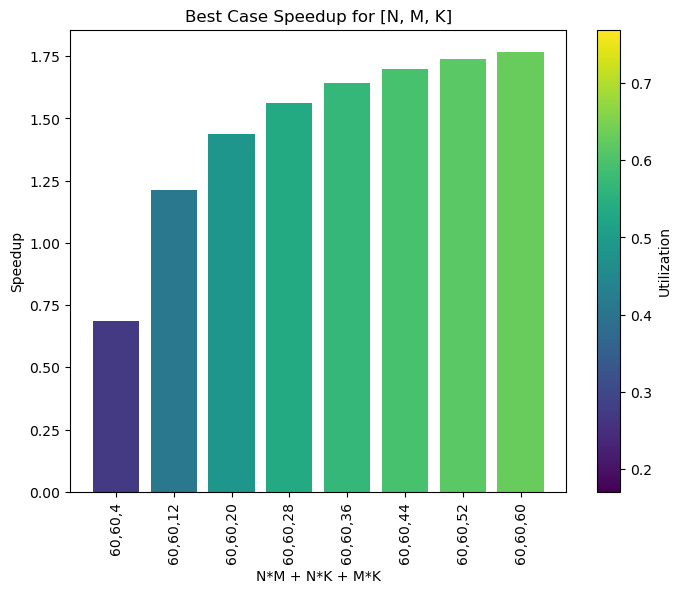

t_uk      util  ops_cycle  max_mregs  max_mrf_capacity  \
M  N  K  vlB  mlB                                                             
60 60 4  64.0 16.0   88.0  0.170455  43.636364        2.0           0.65625   
      12 16.0 16.0  120.0  0.400000  25.600000        2.0           0.18750   
      20 16.0 16.0  152.0  0.526316  33.684211        2.0           0.18750   
      28 16.0 16.0  184.0  0.608696  38.956522        2.0           0.18750   
      36 16.0 16.0  216.0  0.666667  42.666667        2.0           0.18750   
      44 16.0 16.0  248.0  0.709677  45.419355        2.0           0.18750   
      52 16.0 16.0  280.0  0.742857  47.542857        2.0           0.18750   
      60 16.0 16.0  312.0  0.769231  49.230769        2.0           0.18750   

                      mem_bw  max_mem_bw  mrf_capacity     mrf_bw  \
M  N  K  vlB  mlB                                                   
60 60 4  64.0 16.0  6.850370   12.000000        1.3125  85.333333   
      12 16.0 16.0  1.450667    5.600000        0.3750  32.800000   
      20 16.0 16.0  1.346032    6.285714        0.3750  32.571429   
      28 16.0 16.0  1.287901    6.666667        0.3750  32.444444   
      36 16.0 16.0  1.250909    6.909091        0.3750  32.363636   
      44 16.0 16.0  1.225299    7.076923        0.3750  32.307692   
      52 16.0 16.0  1.206519    7.200000        0.3750  32.266667   
      60 16.0 16.0  1.192157    7.294118        0.3750  32.235294   

                    speedup_vec  macc_gates  mrf_gates  opu_gates  \
M  N  K  vlB  mlB                                                   
60 60 4  64.0 16.0     0.687500   1310720.0   215040.0  1525760.0   
      12 16.0 16.0     1.212500    327680.0    61440.0   389120.0   
      20 16.0 16.0     1.437500    327680.0    61440.0   389120.0   
      28 16.0 16.0     1.562500    327680.0    61440.0   389120.0   
      36 16.0 16.0     1.642045    327680.0    61440.0   389120.0   
      44 16.0 16.0     1.697115    327680.0    61440.0   389120.0   
      52 16.0 16.0     1.737500    327680.0    61440.0   389120.0   
      60 16.0 16.0     1.768382    327680.0    61440.0   389120.0   

                    insts_cycle  NM_NK_MK  
M  N  K  vlB  mlB                          
60 60 4  64.0 16.0     0.020833      4080  
      12 16.0 16.0     0.037500      5040  
      20 16.0 16.0     0.044643      6000  
      28 16.0 16.0     0.048611      6960  
      36 16.0 16.0     0.051136      7920  
      44 16.0 16.0     0.052885      8880  
      52 16.0 16.0     0.054167      9840  
      60 16.0 16.0     0.055147     10800

In [10]:
# Calculate the new variable (N*M + N*K + M*K)
perf_model['NM_NK_MK'] = perf_model.index.get_level_values('N') * perf_model.index.get_level_values('M') + \
                         perf_model.index.get_level_values('N') * perf_model.index.get_level_values('K') + \
                         perf_model.index.get_level_values('M') * perf_model.index.get_level_values('K')

pm_pareto = perf_model[['NM_NK_MK', 'speedup_vec']]
mask = paretoset(pm_pareto, sense=['max', 'min'])

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Best Case Speedup for [N, M, K]')
axs.set_xlabel('N*M + N*K + M*K')
axs.set_ylabel('Speedup')

# Create a bar plot with x-axis as the combination of N, M, and K
x_labels = [f'{n},{m},{k}' for n, m, k in zip(perf_model.loc[mask].index.get_level_values('N'), 
                                              perf_model.loc[mask].index.get_level_values('M'), 
                                              perf_model.loc[mask].index.get_level_values('K'))]


speedup = perf_model.loc[mask, 'speedup_vec']
utilization = perf_model.loc[mask, 'util']
scatter = axs.bar(x_labels, speedup, color=plt.cm.viridis(utilization))
axs.set_xticklabels(x_labels, rotation=90)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=utilization.min(), vmax=utilization.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('Utilization')
plt.show()
perf_model.loc[mask].reset_index(level=['databits', 't_mem', 'l2_cache', 'kl', 'num_mregs', 't_op', 'width_mmu'], drop=True)

#### Memory Data Reuse
If the matrices are sufficiently large to reuse tiles, then bandwidth can be decreased:

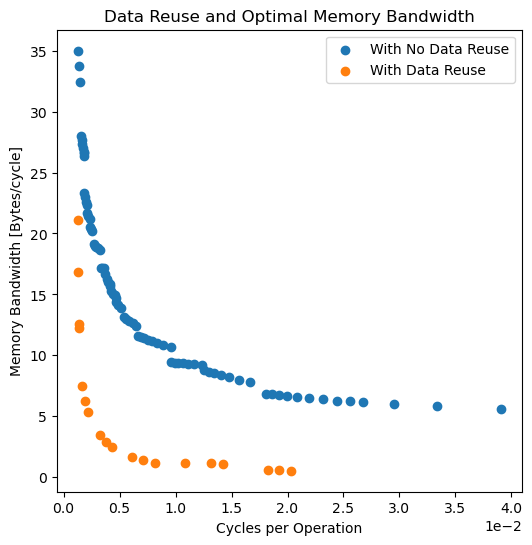

In [11]:
no_reuse_pm = perf_model.copy()
pm_pareto = no_reuse_pm[['ops_cycle','max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min'])

bw = no_reuse_pm.loc[mask,'max_mem_bw']
opc = no_reuse_pm.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
scatter = axs.scatter(1/opc, bw, label='With No Data Reuse')

reuse_perf_model = perf_model.copy()
reuse_perf_model = reuse_perf_model[reuse_perf_model['mem_bw'] <= 64]
reuse_perf_model = reuse_perf_model[reuse_perf_model['ops_cycle'] >= 1/(4e-2)]

pm_pareto = reuse_perf_model[['ops_cycle','mem_bw']]
reuse_mask = paretoset(pm_pareto, sense=['max', 'min'])

bw = reuse_perf_model.loc[reuse_mask,'mem_bw']
opc = reuse_perf_model.loc[reuse_mask,'ops_cycle']

scatter = axs.scatter(1/opc, bw, label='With Data Reuse')
axs.set_title('Data Reuse and Optimal Memory Bandwidth')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Memory Bandwidth [Bytes/cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()


100%|██████████| 585/585 [00:00<00:00, 1420.15it/s]


,,,,,,,,,,,,t_uk,util,ops_cycle,max_mregs,max_mrf_capacity,mem_bw,max_mem_bw,mrf_capacity,mrf_bw,speedup_vec,macc_gates,mrf_gates,opu_gates,insts_cycle
databits,t_mem,M,N,K,l2_cache,kl,vlB,mlB,num_mregs,t_op,width_mmu,,,,,,,,,,,,,,


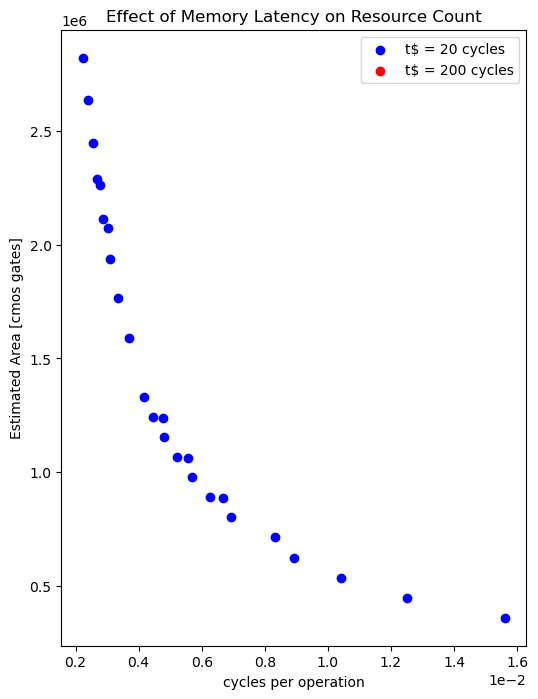

In [12]:
tm20_perf_model = perf_model.copy()
tm200_perf_model = fmodel.init_pm(
    t_mem = np.array([200]),
    l2_cache = np.array([256]),
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
tm20_perf_model = tm20_perf_model[tm20_perf_model['mem_bw'] <= 64]
tm20_perf_model = tm20_perf_model[tm20_perf_model['opu_gates'] <= 3.2e6]
tm20_perf_model = tm20_perf_model[tm20_perf_model['ops_cycle'] >= 10]

tm200_perf_model = tm200_perf_model[tm200_perf_model['mem_bw'] <= 64]
tm200_perf_model = tm200_perf_model[tm200_perf_model['opu_gates'] <= 3.2e6]
tm200_perf_model = tm200_perf_model[tm200_perf_model['ops_cycle'] >= 10]

tm20_pm_pareto = tm20_perf_model[['ops_cycle','opu_gates']]
tm20_mask = paretoset(tm20_pm_pareto, sense=['max', 'min'])

tm200_pm_pareto = tm200_perf_model[['ops_cycle','opu_gates']]
tm200_mask = paretoset(tm200_pm_pareto, sense=['max', 'min'])

fig, axs = plt.subplots(1,figsize=(6,8))
axs.set_title('Effect of Memory Latency on Resource Count')
axs.set_xlabel('cycles per operation')
axs.set_ylabel('Estimated Area [cmos gates]')

bw = tm20_perf_model.loc[tm20_mask,'mem_bw']
ngates = tm20_perf_model.loc[tm20_mask,'opu_gates']
opc = tm20_perf_model.loc[tm20_mask,'ops_cycle']
scatter = axs.scatter(1/opc, ngates, color='b', label='t$ = 20 cycles')

bw = tm200_perf_model.loc[tm200_mask,'mem_bw']
ngates = tm200_perf_model.loc[tm200_mask,'opu_gates']
opc = tm200_perf_model.loc[tm200_mask,'ops_cycle']
scatter = axs.scatter(1/opc, ngates, color='r', label='t$ = 200 cycles')

axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
tm200_perf_model[tm200_mask]

We can compare these tradeoffs for half-width and full-width MMU datapaths:

In [13]:
perf_model = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5, 1])
)
perf_model_t1 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
perf_model_t4 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5])
)
perf_model_t1 = perf_model_t1[perf_model_t1['max_mem_bw'] <= 64]
bw = perf_model_t1['max_mem_bw']
ngates = perf_model_t1['opu_gates']
opc = perf_model_t1['ops_cycle']

perf_model_t4 = perf_model_t4[perf_model_t4['max_mem_bw'] <= 64]
bw_t4 = perf_model_t4['max_mem_bw']
ngates_t4 = perf_model_t4['opu_gates']
opc_t4 = perf_model_t4['ops_cycle']

fig, axs = plt.subplots(2, figsize=(6, 8))
# Plot for full width datapath
axs[0].set_title('Full Width Datapath')
axs[0].set_xlabel('Cycles per Operation')
axs[0].set_ylabel('Estimated Area [cmos gates]')
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
full = axs[0].scatter(1/opc, ngates, c=bw, cmap='autumn', label='full width')
fig.colorbar(full, ax=axs[0], label='Full Width BW [Bytes/cycle]')

# Plot for half width datapath
axs[1].set_title('Half Width Datapath')
axs[1].set_xlabel('Cycles per Operation')
axs[1].set_ylabel('Estimated Area [cmos gates]')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
half = axs[1].scatter(1/opc_t4, ngates_t4, c=bw_t4, cmap='winter', label='half width')
fig.colorbar(half, ax=axs[1], label='Half Width BW [Bytes/cycle]')
plt.tight_layout()
plt.show()


 23%|██▎       | 55687/239616 [00:40<02:15, 1361.47it/s]


KeyboardInterrupt: 

100%|██████████| 585/585 [00:00<00:00, 1542.57it/s]


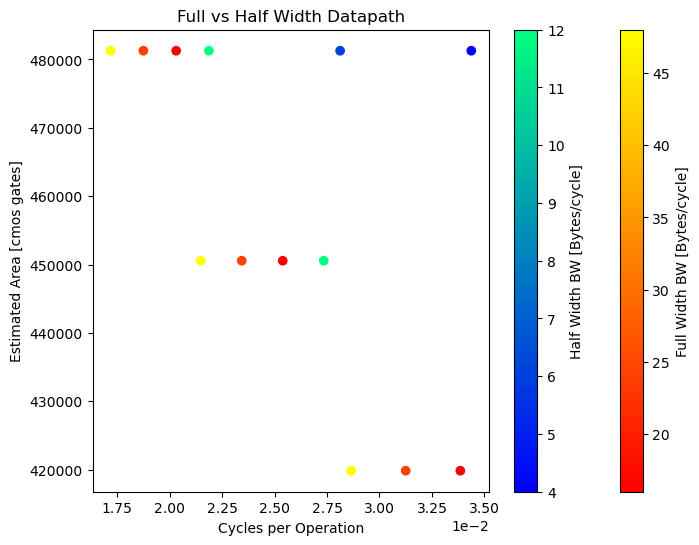

In [ ]:
perf_model_t1 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
perf_model_t4 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,12,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5])
)
perf_model_t1 = perf_model_t1[perf_model_t1['max_mem_bw'] <= 64]
perf_model_t1 = perf_model_t1[perf_model_t1['opu_gates'] <= 2e6]
perf_model_t1 = perf_model_t1[perf_model_t1['ops_cycle'] >= 1/3.5e-2]

pm_pareto = perf_model_t1[['ops_cycle','opu_gates', 'max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model_t1.loc[mask,'max_mem_bw']
ngates = perf_model_t1.loc[mask,'opu_gates']
opc = perf_model_t1.loc[mask,'ops_cycle']

perf_model_t4 = perf_model_t4[perf_model_t4['max_mem_bw'] <= 64]
perf_model_t4 = perf_model_t4[perf_model_t4['opu_gates'] <= 2e6]
perf_model_t4 = perf_model_t4[perf_model_t4['ops_cycle'] >= 1/3.5e-2]

pm_pareto_t4 = perf_model_t4[['ops_cycle','opu_gates', 'max_mem_bw']]
mask_t4 = paretoset(pm_pareto_t4, sense=['max', 'min', 'min'])

bw_t4 = perf_model_t4.loc[mask_t4,'max_mem_bw']
ngates_t4 = perf_model_t4.loc[mask_t4,'opu_gates']
opc_t4 = perf_model_t4.loc[mask_t4,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(8,6))
axs.set_title('Full vs Half Width Datapath')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

full = axs.scatter(1/opc, ngates, c=bw, cmap='autumn', label='full width')
fig.colorbar(full, ax=axs, label = 'Full Width BW [Bytes/cycle]')

half = axs.scatter(1/opc_t4, ngates_t4, c=bw_t4, cmap='winter', label='half width')
fig.colorbar(half, ax=axs, label = 'Half Width BW [Bytes/cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [ ]:
perf_model_t4.loc[mask_t4]

t_uk  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu         
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5        56.0   
                                           10        0    0.5        88.0   
                                                     1    0.5        72.0   
                                                     2    0.5        56.0   

                                                                         util  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5        0.571429   
                                           10        0    0.5        0.454545   
                                                     1    0.5        0.555556   
                                                     2    0.5        0.714286   

                                                                     ops_cycle  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5        36.571429   
                                           10        0    0.5        29.090909   
                                                     1    0.5        35.555556   
                                                     2    0.5        45.714286   

                                                                     max_mregs  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5              4.0   
                                           10        0    0.5              2.0   
                                                     1    0.5              3.0   
                                                     2    0.5              4.0   

                                                                     max_mrf_capacity  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu                     
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5                 0.37500   
                                           10        0    0.5                 0.18750   
                                                     1    0.5                 0.28125   
                                                     2    0.5                 0.37500   

                                                                     mem_bw  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu           
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5           8.5   
                                           10        0    0.5           2.8   
                                                     1    0.5           4.2   
                                                     2    0.5           8.4   

                                                                     max_mem_bw  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu               
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5              12.0   
                                           10        0    0.5               4.0   
                                                     1    0.5               6.0   
                                                     2    0.5              12.0   

                                                                     mrf_capacity  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu                 
32       20    4 4 4 256      1  16.0 16.0 8         2    0.5              0.7500   
                                           10        0    0.5              0.9375   
                                                     1    0.5              0.9375   
                                                     2    0.5              0.9375   

                                                                        mrf_bw  \
databits t_mem M N K l2_cache k

In [ ]:
perf_model_t1.loc[mask]

t_uk  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu         
32       20    4 4 4 256      1  16.0 16.0 6         0    1          52.0   
                                                     1    1          48.0   
                                                     2    1          44.0   
                                           8         0    1          52.0   
                                                     1    1          48.0   
                                                     2    1          44.0   
                                           10        0    1          52.0   
                                                     1    1          48.0   
                                                     2    1          44.0   

                                                                         util  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
32       20    4 4 4 256      1  16.0 16.0 6         0    1          0.461538   
                                                     1    1          0.500000   
                                                     2    1          0.545455   
                                           8         0    1          0.615385   
                                                     1    1          0.666667   
                                                     2    1          0.727273   
                                           10        0    1          0.769231   
                                                     1    1          0.833333   
                                                     2    1          0.909091   

                                                                     ops_cycle  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4 4 4 256      1  16.0 16.0 6         0    1          29.538462   
                                                     1    1          32.000000   
                                                     2    1          34.909091   
                                           8         0    1          39.384615   
                                                     1    1          42.666667   
                                                     2    1          46.545455   
                                           10        0    1          49.230769   
                                                     1    1          53.333333   
                                                     2    1          58.181818   

                                                                     max_mregs  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4 4 4 256      1  16.0 16.0 6         0    1                5.0   
                                                     1    1                6.0   
                                                     2    1               11.0   
                                           8         0    1                5.0   
                                                     1    1                6.0   
                                                     2    1               11.0   
                                           10        0    1                5.0   
                                                     1    1                6.0   
                                                     2    1               11.0   

                                                                     max_mrf_capacity  \
databits t_mem M N K l2_cache kl vlB  mlB  num_mregs t_op width_mmu                     
32       20    4 4 4 256      1  16.0 16.0 6         0    1                   0.46875   
                                                     1    1                   0.56250   
                                                     2    1                   1.03125   
                                           8         0    1                   

In [ ]:
# perf_model = fmodel.init_pm(
#     t_mem = np.array([20]),
#     l2_cache = np.array([256, 512]),
#     mlB = np.array(range(128,513, 32))/8,
#     vlB = np.array([128, 256, 512])/8,
#     num_mregs = np.array(range(2,12,2)),
#     t_op = np.array([0, 1, 2]),
#     width_mmu = np.array([1, 0.5])
# )
# perf_model = perf_model[perf_model['ops_cycle'] >= 64]
# perf_model = perf_model[perf_model['opu_gates'] <= 4]

# pm_pareto = perf_model[['ops_cycle','opu_gates', 'mem_bw']]
# mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

# bw = perf_model.loc[mask,'mem_bw']
# ngates = perf_model.loc[mask,'opu_gates']
# opc = perf_model.loc[mask,'ops_cycle']

# fig, axs = plt.subplots(1,figsize=(6,8))
# axs.set_title('int32 ; 20 cycle mem latency')
# axs.set_xlabel('cycles per operation')
# axs.set_ylabel('Estimated Area [cmos gates]')

# scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
# fig.colorbar(scatter, ax=axs, label = '$ BW [Bytes/cycle]')
# perf_model[mask]

For a given memory latency, plot: 

flops/utilization acheived with given number of registers

min number of registers for full utilization